# CIL Data Split
This notebook evaluates the
training/validation split of the data set
provided by CIL itself.

In [1]:
import os
import sys

# Enable loading of the project module
BASE_DIR = os.path.abspath(os.path.join(os.path.curdir, os.path.pardir))
MODULE_DIR = os.path.join(BASE_DIR, 'src')
sys.path.append(MODULE_DIR)

# Import project module
import road_segmentation as rs

# Import other required modules
import matplotlib.image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load sample paths
NUM_SAMPLES = 100
training_sample_paths = rs.data.cil.training_sample_paths()
assert NUM_SAMPLES == len(training_sample_paths)
all_ids = np.arange(NUM_SAMPLES) + 1

In [3]:
# Perform split with chosen seed
NUM_VALIDATION_SAMPLES = 10
SEED = 42
rng = np.random.RandomState(SEED)
permuted_ids = rng.permutation(all_ids)
training_ids = permuted_ids[:-NUM_VALIDATION_SAMPLES]
validation_ids = permuted_ids[-NUM_VALIDATION_SAMPLES:]

training_ids = np.sort(training_ids)
validation_ids = np.sort(validation_ids)

print('Validation ids:')
print(validation_ids)

Validation ids:
[15 21 52 61 72 75 83 87 92 93]


In [4]:
# Make sure the IDs resulting from the actual implementation match (i.e. fixture)
module_training_ids, module_validation_ids = rs.data.cil.train_validation_split()
assert np.alltrue(module_training_ids == training_ids)
assert np.alltrue(module_validation_ids == validation_ids)

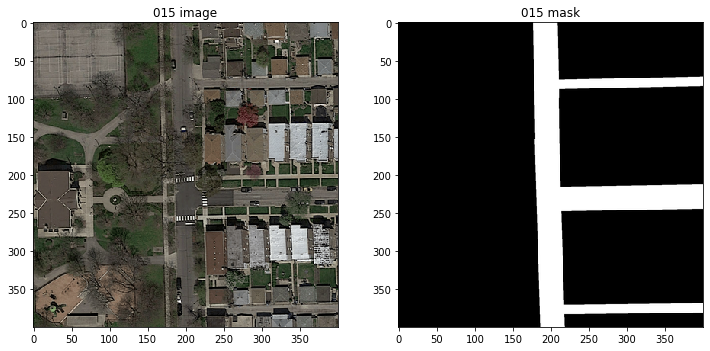

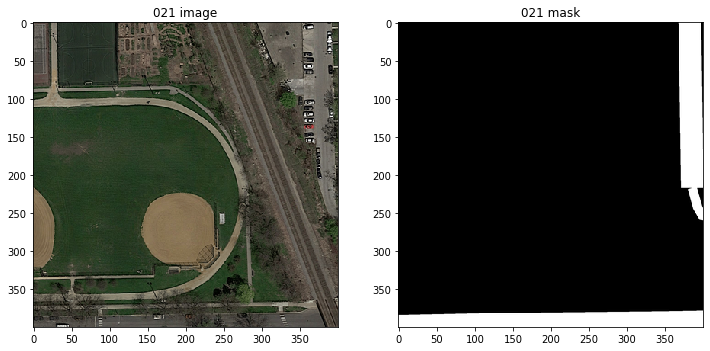

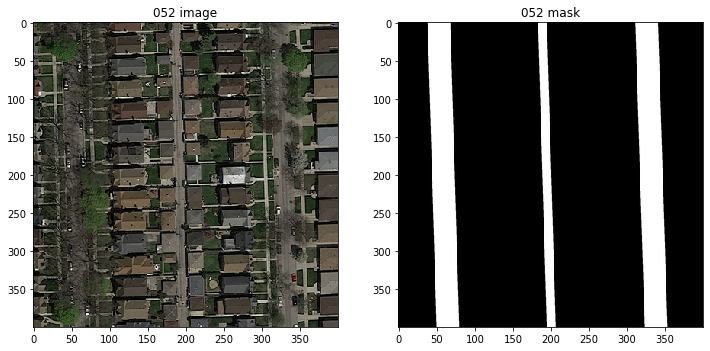

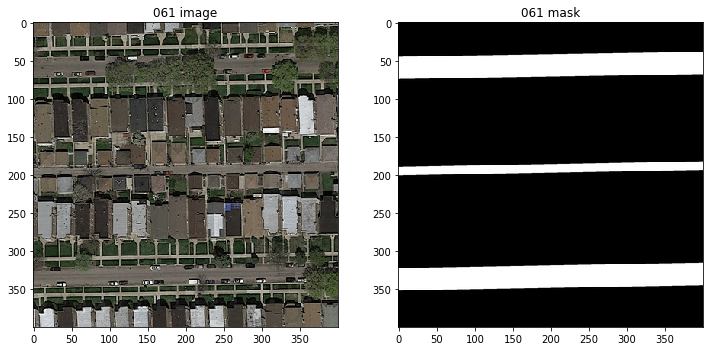

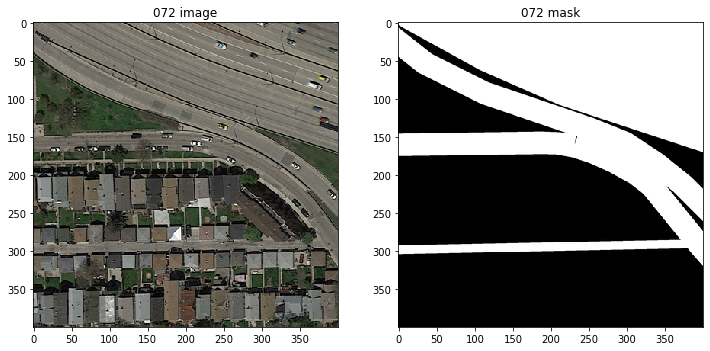

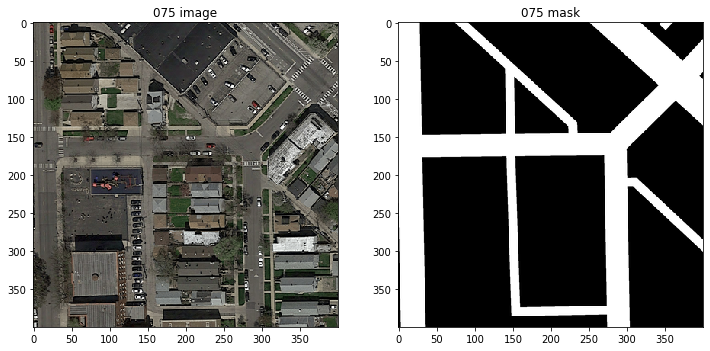

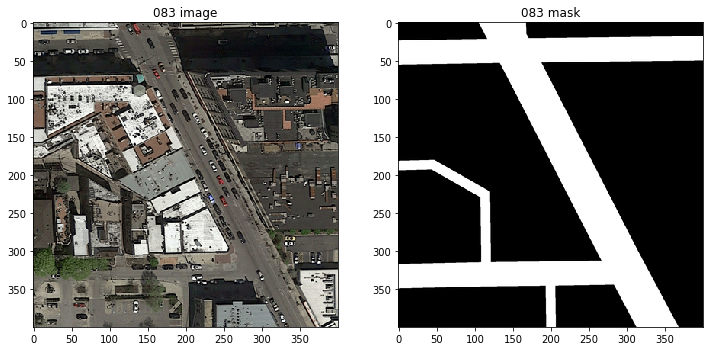

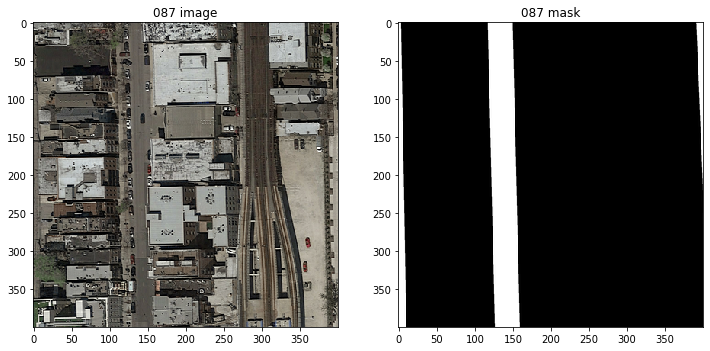

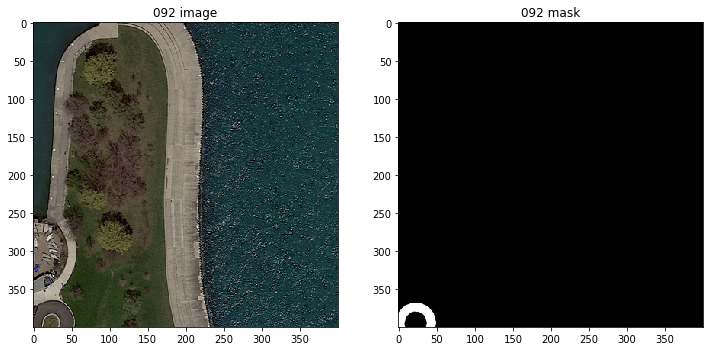

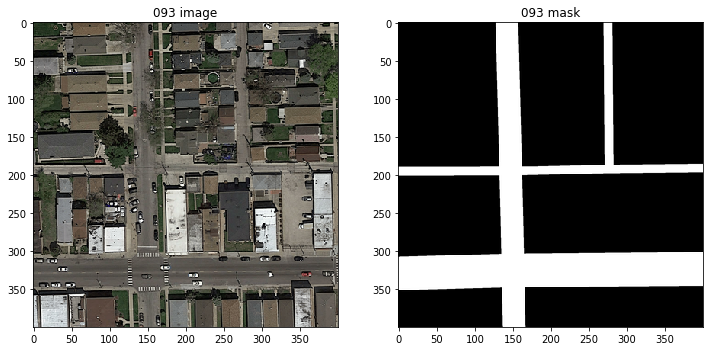

In [5]:
# Plot validation samples
_, validation_paths = rs.data.cil.train_validation_sample_paths()
for validation_id, (image_path, mask_path) in zip(module_validation_ids, validation_paths):
    image = matplotlib.image.imread(image_path)
    mask = matplotlib.image.imread(mask_path)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 8))
    ax[0].set_title(f'{validation_id:03d} image')
    ax[0].imshow(image)
    
    ax[1].set_title(f'{validation_id:03d} mask')
    ax[1].imshow(mask, cmap='gray')